[*********************100%%**********************]  1 of 1 completed


Successfully added RELIANCE.BO


[*********************100%%**********************]  1 of 1 completed


Successfully added TCS.BO


[*********************100%%**********************]  1 of 1 completed


Successfully added INFY.BO


[*********************100%%**********************]  1 of 1 completed


Successfully added HDFCBANK.BO


[*********************100%%**********************]  1 of 1 completed


Successfully added ICICIBANK.BO


[*********************100%%**********************]  1 of 1 completed


Successfully added ITC.BO


[*********************100%%**********************]  1 of 1 completed


Successfully added HINDUNILVR.BO


[*********************100%%**********************]  1 of 1 completed


Successfully added SBIN.BO


[*********************100%%**********************]  1 of 1 completed


Successfully added BAJFINANCE.BO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully added ASIANPAINT.BO

Validated BSE Tickers:
['RELIANCE.BO', 'TCS.BO', 'INFY.BO', 'HDFCBANK.BO', 'ICICIBANK.BO', 'ITC.BO', 'HINDUNILVR.BO', 'SBIN.BO', 'BAJFINANCE.BO', 'ASIANPAINT.BO']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


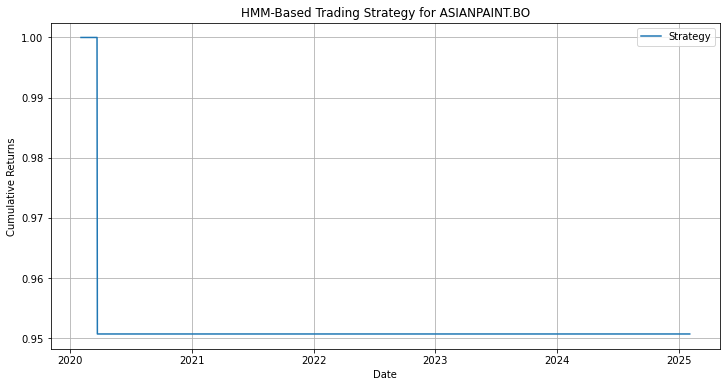

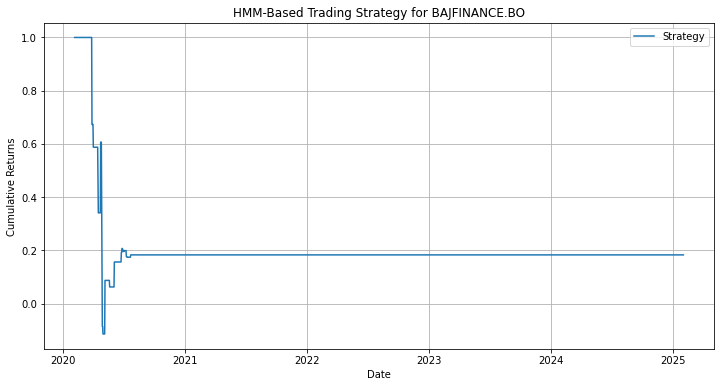

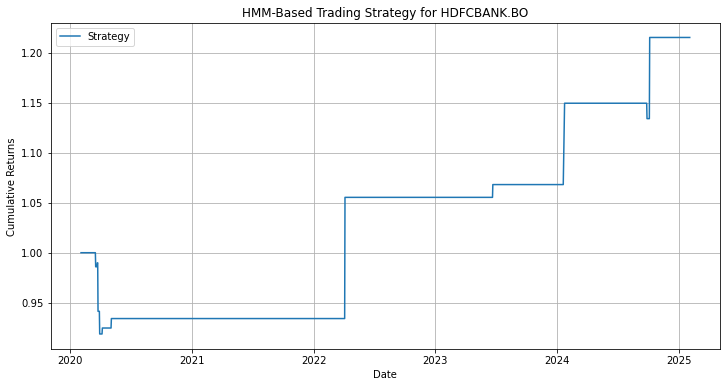

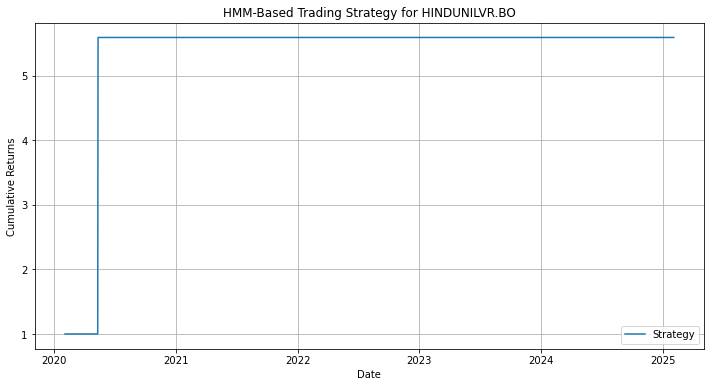

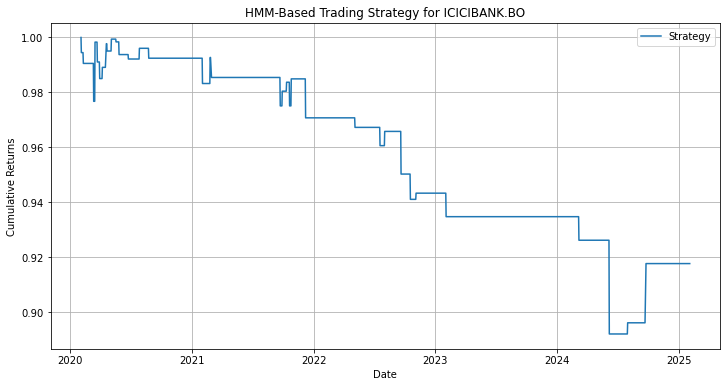

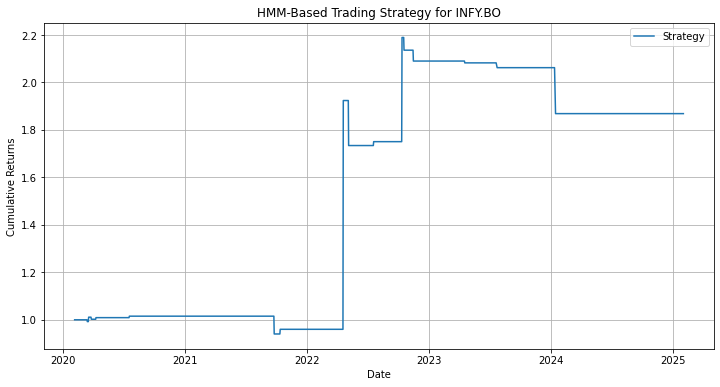

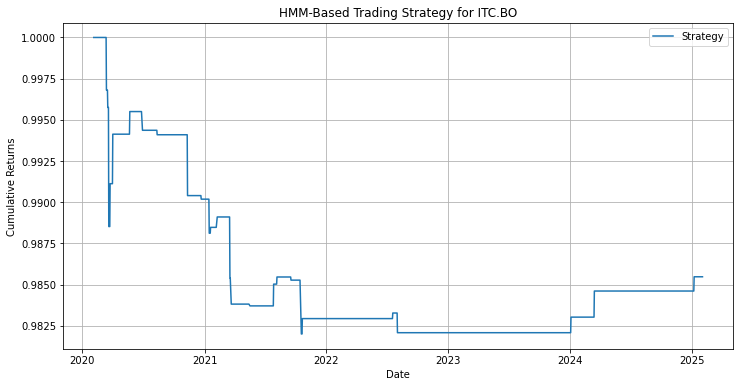

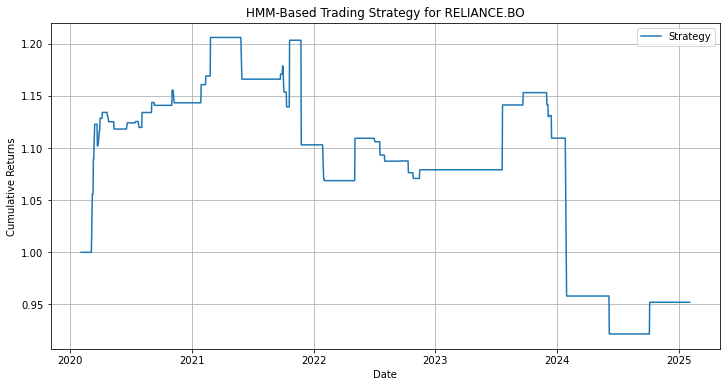

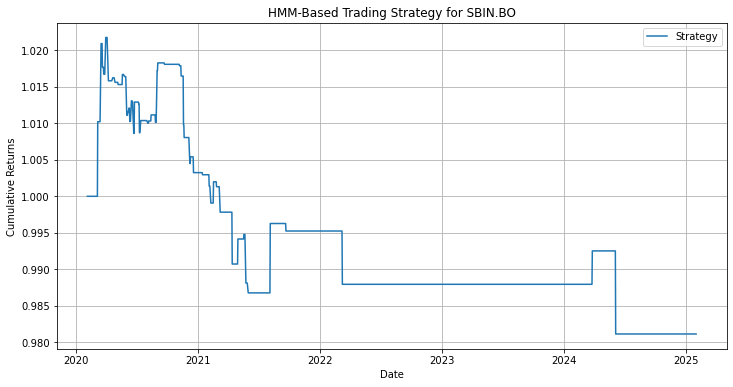

C:\Users\Ankit Singh\AppData\Local\Temp/ipykernel_35772/625850573.py:113: RuntimeWarning: invalid value encountered in double_scalars
  annualized_return = (1 + total_return) ** (252 / trading_days) - 1


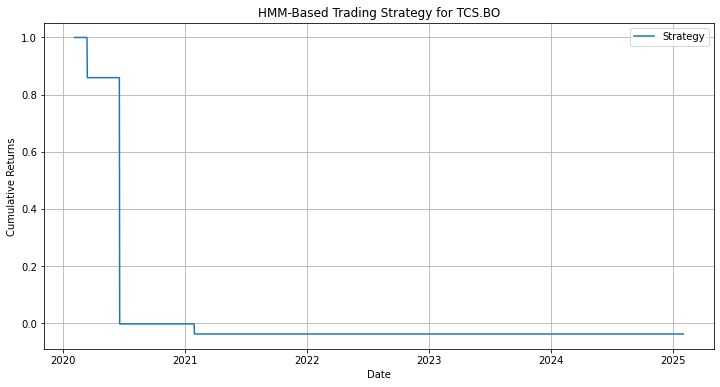


Overall Performance:
Average Total Return: 0.3605
Average Annualized Return: nan
Average Annualized Volatility: 103.1868
Average Sharpe Ratio: nan
Average Maximum Drawdown: -0.2831

Individual Ticker Performance:

Ticker: RELIANCE.BO
Total Return: -0.0493
Annualized Return: -0.0104
Annualized Volatility: 2.2460
Sharpe Ratio: -0.0046
Maximum Drawdown: -0.0493

Ticker: TCS.BO
Total Return: -0.8171
Annualized Return: -0.2970
Annualized Volatility: 127.5844
Sharpe Ratio: -0.0023
Maximum Drawdown: -1.1144

Ticker: INFY.BO
Total Return: 0.2154
Annualized Return: 0.0413
Annualized Volatility: 8.0785
Sharpe Ratio: 0.0051
Maximum Drawdown: -0.0813

Ticker: HDFCBANK.BO
Total Return: 4.5890
Annualized Return: 0.4289
Annualized Volatility: 208.9904
Sharpe Ratio: 0.0021
Maximum Drawdown: 0.0000

Ticker: ICICIBANK.BO
Total Return: -0.0824
Annualized Return: -0.0177
Annualized Volatility: 2.9976
Sharpe Ratio: -0.0059
Maximum Drawdown: -0.1080

Ticker: ITC.BO
Total Return: 0.8687
Annualized Return: 0

In [10]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Fetch BSE Tickers ---
potential_bse_tickers = [
    'RELIANCE.BO', 'TCS.BO', 'INFY.BO', 'HDFCBANK.BO', 'ICICIBANK.BO',
    'ITC.BO', 'HINDUNILVR.BO', 'SBIN.BO', 'BAJFINANCE.BO', 'ASIANPAINT.BO',
    #... add more tickers here...
]

bse_tickers =[]
for ticker in potential_bse_tickers:
    try:
        data = yf.download(ticker, period="5y")
        if not data.empty:
            bse_tickers.append(ticker)
            print(f"Successfully added {ticker}")
        else:
            print(f"No data found for {ticker}. Skipping.")
    except Exception as e:
        print(f"Failed to download data for {ticker}: {e}")

print("\nValidated BSE Tickers:")
print(bse_tickers)

# --- 2. Download and Preprocess Data ---
all_data = pd.DataFrame()

for ticker in bse_tickers:
    try:
        data = yf.download(ticker, period="5y")
        if not data.empty:
            features = data[['Close', 'Volume']].copy()
            features['Ticker'] = ticker
            all_data = pd.concat([all_data, features])
    except Exception as e:
        print(f"Failed to download data for {ticker}: {e}")

if all_data.empty or len(all_data) < 2:
    print("Insufficient data for analysis. Please check your tickers and data availability.")
    exit()

all_data['Daily_Return'] = all_data.groupby('Ticker')['Close'].pct_change() * 100
all_data.dropna(inplace=True)

scaler = StandardScaler()
all_data[['Close', 'Volume', 'Daily_Return']] = scaler.fit_transform(
    all_data[['Close', 'Volume', 'Daily_Return']]
)

# --- 3. Train the Hidden Markov Model ---
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
model.fit(all_data[['Close', 'Volume', 'Daily_Return']])

# --- 4. Make Predictions ---
hidden_states = model.predict(all_data[['Close', 'Volume', 'Daily_Return']])
state_probabilities = model.predict_proba(all_data[['Close', 'Volume', 'Daily_Return']])

# --- 5. Example Trading Logic (Trend Reversal) ---
all_data['signal'] = 0
for i in range(1, len(hidden_states)):
    if (hidden_states[i - 1] == 0 and hidden_states[i] == 1 and
            state_probabilities[i, 1] > 0.5):
        all_data.iloc[i, all_data.columns.get_loc('signal')] = 1  # Buy signal
    if (hidden_states[i - 1] == 1 and hidden_states[i] == 0 and
            state_probabilities[i, 0] > 0.5):
        all_data.iloc[i, all_data.columns.get_loc('signal')] = -1  # Sell signal

# --- 6. Analyze and Backtest ---
grouped_data = all_data.groupby('Ticker')

def calculate_strategy_returns(group_data):
    group_data['current_signal'] = group_data['signal']
    group_data['strategy_returns'] = 0.0
    position = 0
    buy_price = None

    for i in range(len(group_data)):
        if group_data['current_signal'].iloc[i] == 1 and position == 0:
            position = 1
            buy_price = group_data['Close'].iloc[i]
        elif group_data['current_signal'].iloc[i] == -1 and position == 1:
            position = 0
            if buy_price is not None:
                sell_price = group_data['Close'].iloc[i]
                return_percentage = (sell_price - buy_price) / buy_price * 100
                group_data['strategy_returns'].iloc[i] = return_percentage
                buy_price = None
    return group_data

all_results = {}
for ticker, group_data in grouped_data:
    all_results[ticker] = calculate_strategy_returns(group_data)

total_returns =[]
annualized_returns =[]
annualized_volatilities =[]
sharpe_ratios =[]
max_drawdowns =[]

for ticker, group_data in all_results.items():
    cumulative_returns = (1 + group_data['strategy_returns'] / 100).cumprod()

    if not cumulative_returns.empty:
        total_return = cumulative_returns.iloc[-1] - 1
        total_returns.append(total_return)

        trading_days = len(group_data)
        annualized_return = (1 + total_return) ** (252 / trading_days) - 1
        annualized_returns.append(annualized_return)

        annualized_volatility = group_data['strategy_returns'].std() * np.sqrt(252)
        annualized_volatilities.append(annualized_volatility)

        if annualized_volatility > 0:
            sharpe_ratio = annualized_return / annualized_volatility
        else:
            sharpe_ratio = 0.0
        sharpe_ratios.append(sharpe_ratio)

        peak = cumulative_returns.cummax()
        drawdown = (cumulative_returns - peak) / peak
        max_drawdown = drawdown.min()
        max_drawdowns.append(max_drawdown)

        plt.figure(figsize=(12, 6))
        plt.plot(cumulative_returns, label='Strategy')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Returns')
        plt.title(f'HMM-Based Trading Strategy for {ticker}')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No valid cumulative returns for {ticker}. Skipping performance calculation.")
        total_returns.append(0)
        annualized_returns.append(0)
        annualized_volatilities.append(0)
        sharpe_ratios.append(0)
        max_drawdowns.append(0)

print("\nOverall Performance:")
print(f"Average Total Return: {np.mean(total_returns):.4f}")
print(f"Average Annualized Return: {np.mean(annualized_returns):.4f}")
print(f"Average Annualized Volatility: {np.mean(annualized_volatilities):.4f}")
print(f"Average Sharpe Ratio: {np.mean(sharpe_ratios):.4f}")
print(f"Average Maximum Drawdown: {np.mean(max_drawdowns):.4f}")

print("\nIndividual Ticker Performance:")
for i, ticker in enumerate(bse_tickers):
    print(f"\nTicker: {ticker}")
    print(f"Total Return: {total_returns[i]:.4f}")
    print(f"Annualized Return: {annualized_returns[i]:.4f}")
    print(f"Annualized Volatility: {annualized_volatilities[i]:.4f}")
    print(f"Sharpe Ratio: {sharpe_ratios[i]:.4f}")
    print(f"Maximum Drawdown: {max_drawdowns[i]:.4f}")